In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv', 'coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv']


In [2]:
data = pd.read_csv('../input/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')
data = data.dropna()
# data.head(5)
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
7,2014-12-01 05:40:00,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
51,2014-12-01 06:24:00,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0
77,2014-12-01 06:50:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0
1436,2014-12-02 05:29:00,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0


In [3]:
df_index = data.set_index(['Timestamp'])
df_index = df_index.sort_index(axis=1, ascending=True)
print(df_index.head())

                     Close       ...        Weighted_Price
Timestamp                        ...                      
2014-12-01 05:33:00  300.0       ...                 300.0
2014-12-01 05:40:00  300.0       ...                 300.0
2014-12-01 06:24:00  370.0       ...                 370.0
2014-12-01 06:50:00  370.0       ...                 370.0
2014-12-02 05:29:00  377.0       ...                 377.0

[5 rows x 7 columns]


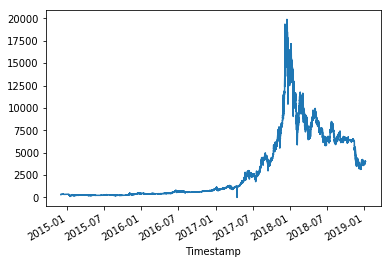

In [4]:
weighted_price_data = df_index['Weighted_Price']
weighted_price_data.plot(y='Weighted_Price')

In [5]:
weighted_price_data.head()

Timestamp
2014-12-01 05:33:00    300.0
2014-12-01 05:40:00    300.0
2014-12-01 06:24:00    370.0
2014-12-01 06:50:00    370.0
2014-12-02 05:29:00    377.0
Name: Weighted_Price, dtype: float64

In [6]:
data.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
7,2014-12-01 05:40:00,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
51,2014-12-01 06:24:00,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0
77,2014-12-01 06:50:00,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0
1436,2014-12-02 05:29:00,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0


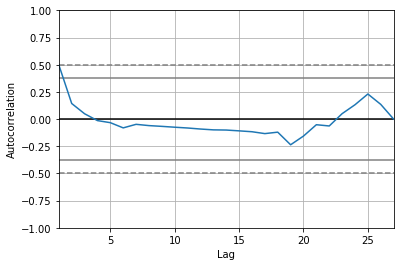

In [7]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

mask = (data['Timestamp'] <= '2015-01-07 22:06:00')
sub_df = data.loc[mask]
sub_df = sub_df[['Timestamp', 'Weighted_Price']]
sub_df = sub_df.set_index('Timestamp')

# dr = pd.date_range(start='2014-12-01 05:33:00', end='2014-12-02 05:29:00')
# df = pd.DataFrame(np.arange(len(dr)), index=dr, columns=["Values"])
# autocorrelation_plot(df)
# plt.show()

autocorrelation_plot(sub_df)
plt.show()

In [8]:
data.tail(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2099755,2019-01-07 22:02:00,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,2019-01-07 22:03:00,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2099757,2019-01-07 22:04:00,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,2019-01-07 22:05:00,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991
2099759,2019-01-07 22:06:00,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614


In [9]:
arima_data = data[['Weighted_Price']]
# arima_data.set_index('Timestamp')

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# model = ARIMA(arima_data, order=(2, 1, 0))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())


/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of 

KeyboardInterrupt: 

In [ ]:
from pandas import DataFrame

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

**parameter d means differencing data d times. Differencing data is to make data stationary. Stationary means the way time series changes doens't change. For example, y=ax+b is stationary. **

The right oder of differencing is by least times of differencing, the data gets to a near-stationary series which romas around defined mean and ACF plot reaches to zero fairly quick. 

Use Augemented Dickey Fuller test to tell if a data series is stationary. No differncing is needed if data series is stationary.  

In [11]:
data['Weighted_Price'].head(5)

0       300.0
7       300.0
51      370.0
77      370.0
1436    377.0
Name: Weighted_Price, dtype: float64

In [12]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(data['Weighted_Price'][:1000])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -2.013669
p-value: 0.280612


In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9, 7), 'figure.dpi':120})

data_sub = data['Weighted_Price'][:1000]

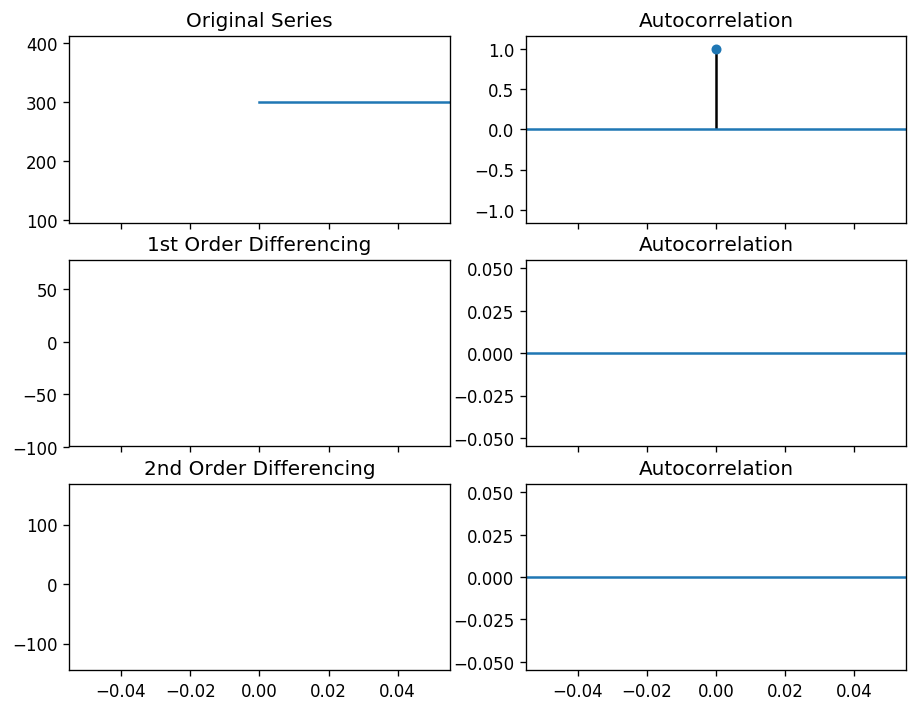

In [19]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data_sub)
axes[0, 0].set_title('Original Series')
plot_acf(data_sub, ax=axes[0, 1])

# 1st differencing
axes[1, 0].plot(data_sub.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data_sub.diff(), ax=axes[1, 1])

# 2nd differencing
axes[2, 0].plot(data_sub.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data_sub.diff().diff(), ax=axes[2, 1])

plt.show()
